<a href="https://colab.research.google.com/github/maressakaren/Reconhecimento_de_emocoes_em_tweets/blob/main/classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando bibliotecas

!pip install datasets
!pip install unidecode
!pip install nltk
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.2 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import numpy as np
import spacy
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
from datasets import load_dataset
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
def pre_processing(tweets):
    nlp = spacy.load('en_core_web_sm')
    new_tweets = []
    stop_words = set(stopwords.words('english'))
    for tweet in tweets:
        new_tweet = unidecode(tweet)

        words = new_tweet.split()
        filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
        new_tweet = ' '.join(filtered_words)
        new_tweet = re.sub(r'@\w+', '', new_tweet)
        new_tweet = re.sub(r'(.)\1\1+', r'\1', new_tweet)
        new_tweet = re.sub(r'\s\s+', ' ', new_tweet)
        doc = nlp(new_tweet)
        tokens = [t.lemma_.lower() for t in doc if len(t.lemma_) > 1 and t.pos_ != 'PUNCT' and t.is_alpha]#fazendo marcação gramatical
        new_tweet = ' '.join(tokens)
        new_tweets.append(new_tweet)

    return new_tweets



def pre_processing2(textos, labels):
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.RSLPStemmer()
    frasesstemming = []
    new_tweet = []
    i=0

    for tweet in textos:
        new_tweet = unidecode(tweet)
        new_tweet = re.sub(r'@\w+', '', new_tweet)
        new_tweet = re.sub(r'(.)\1\1+', r'\1', new_tweet)
        new_tweet = re.sub(r'\s\s+', ' ', new_tweet)

        new_tweet = [word for word in new_tweet if word not in stop_words and word.isalpha()] #Removendo as stopWords
        comstemming = [str(stemmer.stem(p)) for p in tweet.split()]
        # Realiza o stemming nas palavras do tweet, excluindo as stopwords

        frasesstemming.append((' '.join(comstemming), labels[i]))
        i=i+1;
        #print(comstemming)
        # Adiciona o texto processado e sua respectiva label a frasesstemming

    #print(frasesstemming)
    return frasesstemming

def word_frequency(textos):
    words = [word for word, _ in textos for word in word.split()]
    frequency = nltk.FreqDist(words)

    print(frequency)
    return frequency

def search_words(frequency):
  ferquency_words = frequency.keys



  0%|          | 0/3 [00:00<?, ?it/s]

******Antes de Processar****:
i didnt feel humiliated - 0
im feeling quite sad and sorry for myself but ill snap out of it soon - 0
im feeling rather rotten so im not very ambitious right now - 0
******Depois de Processar****:
do not feel humiliate - 0
feel quite sad sorry ill snap soon - 0
feel rather rotten ambitious right - 0

Vocabulário: 12108

Features: ['aa' 'aac' 'aah' ... 'zum' 'zumba' 'zz']


 Treinamento:  16000 - 16000


 Validação:  2000 - 2000


 Teste:  2000 - 2000


Avaliação dos Classificadores


Nome: LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Classification Report (Teste):               precision    recall  f1-score   support

           0       0.91      0.92      0.92       581
           1       0.89      0.91      0.90       695
           2       0.74      0.70      0.72       159
           3       0.88      0.87      0.88       275
           4       0.85      0.85      0.85       224
           5       0.73      0.61      0.66        66

    accuracy                           0.88      2000
   macro avg       0.83      0.81      0.82      2000
weighted avg       0.87      0.88      0.87      2000



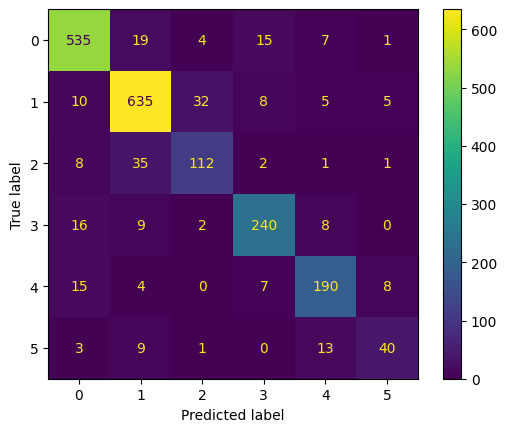


Nome: MultinomialNB
  Classification Report (Teste):               precision    recall  f1-score   support

           0       0.74      0.91      0.82       581
           1       0.76      0.96      0.85       695
           2       0.84      0.27      0.41       159
           3       0.90      0.63      0.74       275
           4       0.83      0.60      0.70       224
           5       1.00      0.06      0.11        66

    accuracy                           0.78      2000
   macro avg       0.85      0.57      0.60      2000
weighted avg       0.80      0.78      0.75      2000



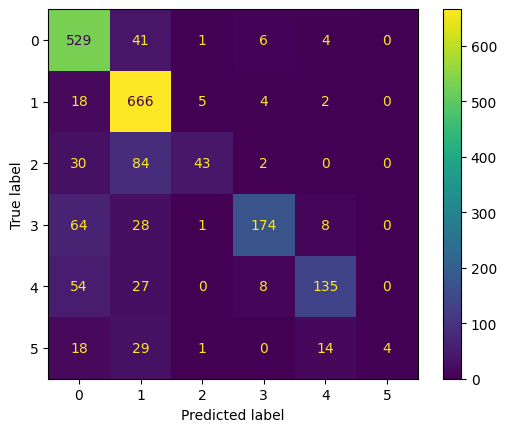


Nome: KNN
  Classification Report (Teste):               precision    recall  f1-score   support

           0       0.55      0.76      0.64       581
           1       0.72      0.66      0.69       695
           2       0.28      0.45      0.34       159
           3       0.76      0.41      0.53       275
           4       0.78      0.42      0.55       224
           5       0.53      0.24      0.33        66

    accuracy                           0.60      2000
   macro avg       0.60      0.49      0.51      2000
weighted avg       0.64      0.60      0.60      2000



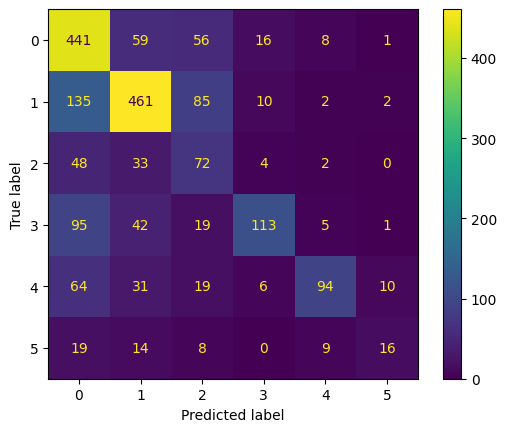


Nome: Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Classification Report (Teste):               precision    recall  f1-score   support

           0       0.00      0.00      0.00       581
           1       0.35      1.00      0.52       695
           2       0.00      0.00      0.00       159
           3       1.00      0.03      0.05       275
           4       0.52      0.05      0.09       224
           5       0.70      0.11      0.18        66

    accuracy                           0.36      2000
   macro avg       0.43      0.20      0.14      2000
weighted avg       0.34      0.36      0.20      2000



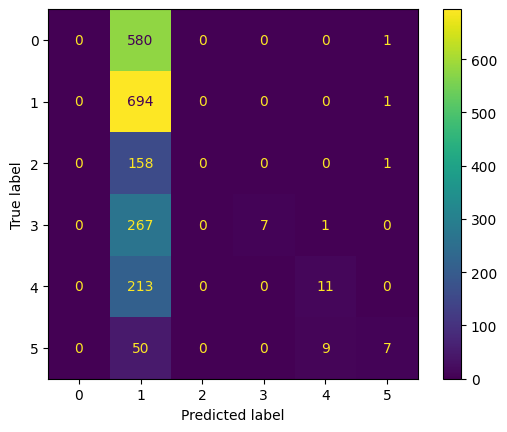


Nome: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Classification Report (Teste):               precision    recall  f1-score   support

           0       1.00      0.00      0.00       581
           1       0.35      1.00      0.52       695
           2       0.00      0.00      0.00       159
           3       0.00      0.00      0.00       275
           4       0.00      0.00      0.00       224
           5       0.00      0.00      0.00        66

    accuracy                           0.35      2000
   macro avg       0.22      0.17      0.09      2000
weighted avg       0.41      0.35      0.18      2000



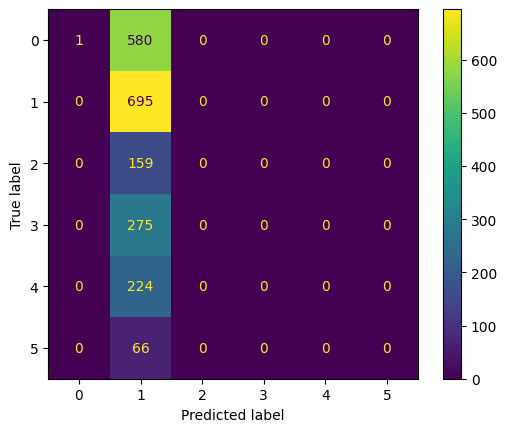


Nome: MLP
  Classification Report (Teste):               precision    recall  f1-score   support

           0       0.90      0.93      0.92       581
           1       0.86      0.94      0.90       695
           2       0.78      0.60      0.68       159
           3       0.89      0.82      0.85       275
           4       0.82      0.85      0.84       224
           5       0.87      0.41      0.56        66

    accuracy                           0.87      2000
   macro avg       0.85      0.76      0.79      2000
weighted avg       0.87      0.87      0.86      2000



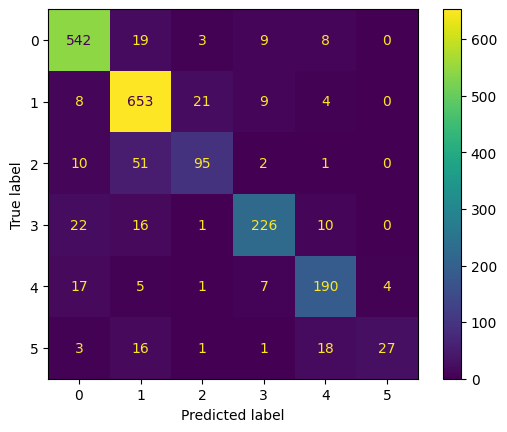

In [ ]:
if __name__ == '__main__':


    dataset = load_dataset("dair-ai/emotion")
    tweets_train = dataset['train']['text']
    tweets_validation = dataset['validation']['text']
    tweets_test = dataset['test']['text']

    labels_train = dataset['train']['label']
    labels_validation = dataset['validation']['label']
    labels_test = dataset['test']['label']

    print("******Antes de Processar****:")
    print(tweets_train[0],"-",labels_train[0])
    print(tweets_validation[0],"-",labels_validation[0])
    print(tweets_test[0],"-",labels_test[0])

    tweets_train = pre_processing(tweets_train)
    tweets_validation = pre_processing(tweets_validation)
    tweets_test = pre_processing(tweets_test)
    print("******Depois de Processar****:")
    print(tweets_train[0],"-",labels_train[0])
    print(tweets_validation[0],"-",labels_validation[0])
    print(tweets_test[0],"-",labels_test[0])


    opcao_vetorizador = 1

    if opcao_vetorizador == 1:
        vetorizador = CountVectorizer(binary=True, ngram_range=(1, 1), max_features=None)
    elif opcao_vetorizador == 2:
        vetorizador = CountVectorizer(binary=False, ngram_range=(1, 1))
    else:
        vetorizador = TfidfVectorizer(ngram_range=(1, 1))#ponderação de importancia das palavras de acordo com sua frequencia no documento todo e no texto atual.

    train_vetorizados = vetorizador.fit_transform(tweets_train).toarray()
    validation_vetorizados = vetorizador.transform(tweets_validation).toarray()
    test_vetorizados = vetorizador.transform(tweets_test).toarray()

    print('\nVocabulário:', len(vetorizador.vocabulary_))
    print('\nFeatures:', vetorizador.get_feature_names_out())

    print("\n\n Treinamento: ", len(train_vetorizados),'-', len(labels_train))
    print("\n\n Validação: ", len(validation_vetorizados), '-', len(labels_validation))
    print("\n\n Teste: ", len(test_vetorizados), '-', len(labels_test))

    classificadores = {
        'LogisticRegression': LogisticRegression(),
        'MultinomialNB': MultinomialNB(),
        'KNN': KNeighborsClassifier(3),
        'Decision Tree': DecisionTreeClassifier(max_depth=5),
        'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        'MLP': MLPClassifier(alpha=1, max_iter=1000),
    }
    print('\n\nAvaliação dos Classificadores\n')

    for nome, classificador in classificadores.items():

        print('\nNome:', nome)

        classificador.fit(train_vetorizados, labels_train)


        pred_test = classificador.predict(test_vetorizados)
        report_test = classification_report(labels_test,pred_test)
        print('  Classification Report (Teste):', report_test)

        ConfusionMatrixDisplay.from_predictions(labels_test,  pred_test)
        plt.show()






